# 1- Khai báo các thư viện sử dụng

In [1]:
# Xử lý dữ liệu
import pandas as pd
import numpy as np

# Trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns

# Chuẩn bị dữ liệu
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Mô hình Random Forest
from sklearn.ensemble import RandomForestClassifier

# Đánh giá hiệu năng
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# Chọn đặc trưng quan trọng
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

# Tìm kiếm tham số tối ưu
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Xử lý dữ liệu không cân bằng (nếu cần)
from imblearn.over_sampling import SMOTE

# 2- Đọc thông tin tập dữ liệu

In [2]:
data = pd.read_csv("E:/project2/Project_A/Mô hình và dữ liệu/Data/data.csv", encoding='latin1')

In [3]:
data

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


## 2.1. Đổi tên cột để rút gọn

In [4]:
data.columns = ['Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos', 'Sgpt', 'Sgot', 'Total Proteins', 'ALB', 'A/G Ratio', 'Result']
# Hiển thị DataFrame với tên cột mới
data

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


## 2.2. Mô tả các biến trong bộ dữ liệu

- **Age**: Tuổi của bệnh nhân (năm).  
- **Gender**: Giới tính của bệnh nhân (Male hoặc Female).  
- **Total Bilirubin**: Mức bilirubin toàn phần trong máu (mg/dL).  
- **Direct Bilirubin**: Mức bilirubin trực tiếp trong máu (mg/dL).  
- **Alkphos (Alkaline Phosphotase)**: Mức enzyme phosphatase kiềm trong máu (IU/L).  
- **Sgpt (SGPT)**: Mức enzyme alamine aminotransferase, chỉ số gan (IU/L).  
- **Sgot (SGOT)**: Mức enzyme aspartate aminotransferase, chỉ số gan (IU/L).  
- **TP (Total Proteins)**: Tổng lượng protein có trong máu (g/dL).  
- **ALB (Albumin)**: Mức albumin trong máu (g/dL).  
- **A/G Ratio**: Tỷ lệ giữa albumin và globulin trong máu.  
- **Result**: Kết quả bệnh nhân mắc bệnh gan (1: mắc bệnh gan, 2: không mắc bệnh gan).  

# 3- Xử lý dữ liệu

## 3.1. Kiểm tra giá trị trùng lặp

In [5]:
# Lọc các bản ghi trùng lặp
duplicate_records = data[data.duplicated(keep=False)]
duplicate_records_sorted = duplicate_records.sort_values(by=list(data.columns))

print("Số lượng bản ghi trùng lặp:", duplicate_records_sorted.shape[0])
# Hiển thị các bản ghi trùng lặp
duplicate_records_sorted.head(6)

Số lượng bản ghi trùng lặp: 18589


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
14155,4.0,Female,0.7,0.2,208.0,35.0,97.0,5.1,2.1,0.7,1
20220,4.0,Female,0.7,0.2,208.0,35.0,97.0,5.1,2.1,0.7,1
14161,4.0,Female,0.8,0.2,215.0,24.0,17.0,6.3,3.0,0.9,2
20226,4.0,Female,0.8,0.2,215.0,24.0,17.0,6.3,3.0,0.9,2
14946,4.0,Female,1.8,0.9,220.0,20.0,43.0,6.5,3.0,0.8,1
28602,4.0,Female,1.8,0.9,220.0,20.0,43.0,6.5,3.0,0.8,1


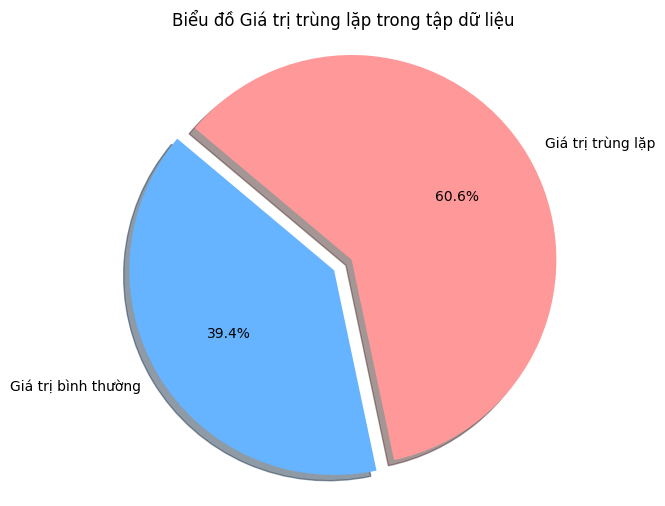

In [6]:
# Dữ liệu trùng lặp và tổng số bản ghi đã được cung cấp
duplicates_count = 18589
total_count = 30691

# Tính phần trăm của dữ liệu trùng lặp
duplicates_percentage = (duplicates_count / total_count) * 100
unique_percentage = 100 - duplicates_percentage

# Vẽ biểu đồ tròn
labels = ['Giá trị bình thường', 'Giá trị trùng lặp']
sizes = [unique_percentage, duplicates_percentage]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # Nổi bật phần trùng lặp

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Biểu đồ Giá trị trùng lặp trong tập dữ liệu')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

In [7]:
# Xóa các bản ghi trùng lặp và giữ lại bản ghi cuối cùng
data_clean = data.drop_duplicates(keep='last')

# Hiển thị kết quả sau khi xóa trùng lặp
data_clean

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
6,26.0,Female,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
10,57.0,Male,0.6,0.1,210.0,51.0,59.0,5.9,2.7,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


## 3.2. Kiểm tra dữ liệu thiếu

In [8]:
# Kiểm tra số lượng dữ liệu thiếu trong mỗi cột
print(data_clean.isna().sum())

Age                   1
Gender              796
Total Bilirubin     557
Direct Bilirubin    490
Alkphos             694
Sgpt                459
Sgot                393
Total Proteins      370
ALB                 413
A/G Ratio           436
Result                0
dtype: int64


In [9]:
# Xóa các dòng có giá trị thiếu
data_clean = data_clean.dropna()
data_clean

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
10,57.0,Male,0.6,0.1,210.0,51.0,59.0,5.9,2.7,0.80,1
30,57.0,Male,4.0,1.9,190.0,45.0,111.0,5.2,1.5,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


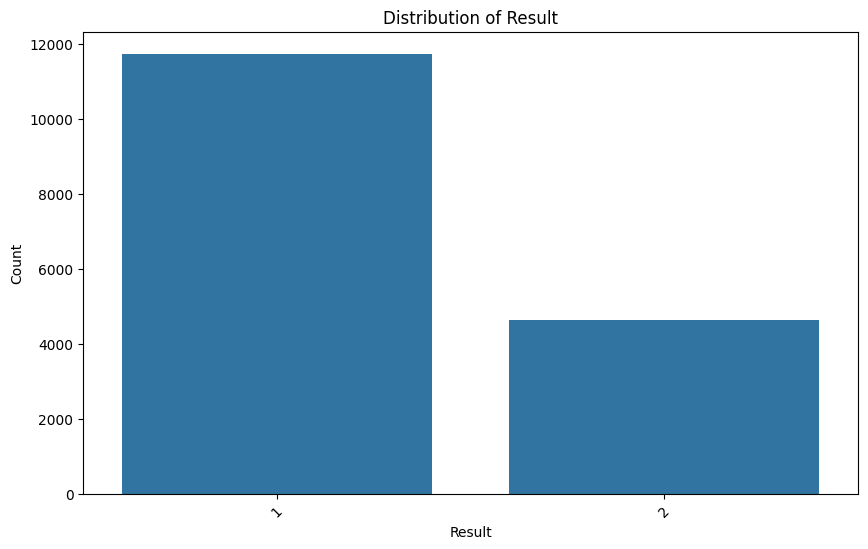

In [10]:
plt.figure(figsize=(10, 6))  
sns.countplot(data_clean, x='Result')  
plt.title('Distribution of Result')  
plt.xlabel('Result')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  
plt.show() 

## 3.3. Kiểm tra lỗi cấu trúc và sửa lỗi

In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16389 entries, 3 to 30690
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               16389 non-null  float64
 1   Gender            16389 non-null  object 
 2   Total Bilirubin   16389 non-null  float64
 3   Direct Bilirubin  16389 non-null  float64
 4   Alkphos           16389 non-null  float64
 5   Sgpt              16389 non-null  float64
 6   Sgot              16389 non-null  float64
 7   Total Proteins    16389 non-null  float64
 8   ALB               16389 non-null  float64
 9   A/G Ratio         16389 non-null  float64
 10  Result            16389 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.5+ MB


### Nhận xét:
+ Biến Age nên đổi thành kiểu số nguyên.
+ Biến Gender là biến phân loại (Male / Female) nên đổi thành giá trị 0 và 1 trước khi xây mô hình.
+ Các biến còn lại đều có kiểu dữ liệu chính xác.

In [12]:
# Chuyển đổi Age thành kiểu int64
data_clean['Age'] = data_clean['Age'].astype(int)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9580\413095453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Age'] = data_clean['Age'].astype(int)


In [13]:
# Gán giá trị 0 và 1 cho cột 'Gender' (Male: 1, Female: 0)
data_clean.loc[:, 'Gender'] = data_clean['Gender'].map({'Male': 1, 'Female': 0})

In [14]:
data_clean

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
3,58,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
7,29,0,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
10,57,1,0.6,0.1,210.0,51.0,59.0,5.9,2.7,0.80,1
30,57,1,4.0,1.9,190.0,45.0,111.0,5.2,1.5,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50,1,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55,1,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54,1,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48,0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


## 3.4. Kiểm tra ngoại lệ

###  <i><span style="color:red;">  Dữ liệu thực tế có thể chứa các giá trị ngoại lai từ bệnh nhân đặc biệt, và những giá trị này có thể cải thiện hiệu quả mô hình. Do đó, cần kiểm tra những giá trị này trước khi quyết định xóa hay giữ lại chúng.</span></i>

In [15]:
data_clean.describe()

,Age,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
count,16389.000000,16389.000000,16389.000000,16389.000000,16389.000000,16389.000000,16389.000000,16389.000000,16389.000000,16389.000000
mean,43.770517,3.360431,1.530429,290.826835,80.147294,111.367564,6.487705,3.136573,0.946612,1.283056
std,16.529487,6.208708,2.894558,240.945972,180.010180,280.665994,1.090549,0.794006,0.323337,0.450497
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### <i><span style="color:red;"> Biến Age (Tuổi)</span></i>
- **Số lượng quan sát:** 16,389.  
- **Giá trị nhỏ nhất:** 4 tuổi.  
- **Giá trị lớn nhất:** 90 tuổi.  
- **Giá trị trung bình:** 43.77 tuổi.  
- **Phân phối:**  
  - 25% nhỏ hơn hoặc bằng 32 tuổi.  
  - 50% (trung vị) là 45 tuổi.  
  - 75% nhỏ hơn hoặc bằng 55 tuổi.  

### Nhận xét:
Độ tuổi có khoảng biến thiên rộng từ 4 đến 90 tuổi, cho thấy bệnh gan có thể xuất hiện ở mọi độ tuổi. Tuy nhiên, phân phối tập trung hơn ở nhóm trung niên và người lớn tuổi (trung vị 45, trung bình 43.77). Và không có ngoại lai trong biến này.


### <i><span style="color:red;"> Biến Total Bilirubin (Bilirubin toàn phần)</span></i>
- **Số lượng quan sát:** 16,389.  
- **Giá trị nhỏ nhất:** 0.4 mg/dL.  
- **Giá trị lớn nhất:** 75 mg/dL.  
- **Giá trị trung bình:** 3.36 mg/dL.  
- **Phân phối:**  
  - 25% nhỏ hơn hoặc bằng 0.8 mg/dL.  
  - 50% (trung vị) là 1.0 mg/dL.  
  - 75% nhỏ hơn hoặc bằng 2.7 mg/dL.  

### Nhận xét:
+ Trẻ sơ sinh: Nhỏ hơn 10 mg/dL  
+ Trẻ trên 1 tháng tuổi: Từ 0.3 – 1.2 mg/dL
+ Người lớn: Từ 0.2 – 1.0 mg/dL
+ Chỉ số Total Bilirubin cao nhất trên thế giới được ghi nhận là 45 mg/dL.
+ Trong tập dữ liệu xuất hiện giá trị Total Bilirubin bằng 75 mg/dL, cho thấy đây có thể là giá trị ngoại lai nên cần kiểm tra.

In [16]:
data_TB = data_clean[data_clean['Total Bilirubin'] >= 45]
print('Những bệnh nhân có chỉ số TB cao hơn 45: ')
data_TB

Những bệnh nhân có chỉ số TB cao hơn 45: 


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
3664,22,0,75.0,3.6,332.0,40.0,66.0,6.2,2.5,0.6,1
7745,75,1,75.0,3.6,332.0,40.0,66.0,6.2,2.5,0.6,1
8911,62,1,75.0,3.6,332.0,40.0,66.0,6.2,2.5,0.6,1
10077,60,1,75.0,3.6,332.0,40.0,66.0,6.2,2.5,0.6,1
11604,30,1,75.0,3.6,332.0,40.0,66.0,6.2,2.5,0.6,1
12900,27,1,75.0,3.6,332.0,40.0,66.0,6.2,2.5,0.6,1
13675,22,1,75.0,3.6,332.0,40.0,66.0,6.2,2.5,0.6,1
18506,45,1,75.0,3.6,332.0,40.0,66.0,6.2,2.5,0.6,1
21186,49,0,75.0,3.6,332.0,40.0,66.0,6.2,2.5,0.6,1
21769,65,1,75.0,3.6,332.0,40.0,66.0,6.2,2.5,0.6,1


#### Nhận xét: Sau khi xem xét thì thấy có nhiều bệnh nhân cùng có chỉ số TB cao nên cần giữ lại những giá trị này để tăng khả năng dự đoán của mô hình với những dữ liệu này.

### <i><span style="color:red;"> Biến Direct Bilirubin (Bilirubin trực tiếp)</span></i>
- **Số lượng quan sát:** 16,389.  
- **Giá trị nhỏ nhất:** 0.1 mg/dL.  
- **Giá trị lớn nhất:** 19.7 mg/dL.  
- **Giá trị trung bình:** 1.53 mg/dL.  
- **Phân phối:**  
  - 25% nhỏ hơn hoặc bằng 0.3 mg/dL (trong ngưỡng bình thường).  
  - 50% (trung vị) là 0.2 mg/dL (trong ngưỡng bình thường).  
  - 75% nhỏ hơn hoặc bằng 1.3 mg/dL (cao hơn ngưỡng bình thường).  

#### **Nhận xét:**
- Giá trị **Direct Bilirubin (DB)** ở phần lớn quan sát thấp (dưới 0.3 mg/dL), phù hợp với mức bình thường của người khỏe mạnh.  
- Tuy nhiên, giá trị trung bình là **1.53 mg/dL**, cao hơn mức bình thường (0.1–0.3 mg/dL), cho thấy nhiều trường hợp có **bilirubin trực tiếp tăng cao**, đặc biệt khi **Total Bilirubin (TB)** cũng cao.  
- Giá trị lớn nhất là **19.7 mg/dL**, vượt xa ngưỡng bình thường. Đây có thể là dấu hiệu của các bệnh lý nghiêm trọng.
- Vì DB là một phần của TB, các trường hợp có DB cao thường xuất hiện đồng thời với TB cao. Điều này cho thấy **giữ lại các ngoại lai của DB** có thể cần thiết để phân tích các trường hợp bệnh lý nặng hoặc hiếm gặp.  
- Kết hợp với Total Bilirubin, **Direct Bilirubin** không chỉ cung cấp thông tin chi tiết về chức năng gan mà còn giúp nhận diện các bất thường nghiêm trọng trong quá trình bài tiết bilirubin

### <i><span style="color:red;"> Alkphos (ALP-Enzyme phản ánh chức năng gan)</span></i>
+ **Số lượng quan sát**: 16,389.
+ **Giá trị nhỏ nhất**: 63 IU/L.
+ **Giá trị lớn nhất**: 2,110 IU/L.
+ **Giá trị trung bình**: 290.83 IU/L.
+ **Phân phối**:
    + 25% nhỏ hơn hoặc bằng 175 IU/L.
    + 50% (trung vị) là 209 IU/L.
    + 75% nhỏ hơn hoặc bằng 298 IU/L.
- Alkphos rất cao (>1200 U/L) thường liên quan đến các bệnh lý nghiêm trọng như:
  - **Tắc nghẽn đường mật.**
  - **Ung thư gan hoặc đường mật.**
  - **Bệnh xương nghiêm trọng** (ví dụ: bệnh Paget, ung thư xương).  

In [17]:
data_alp = data_clean[data_clean['Alkphos'] >= 1200]  
print("Những bệnh nhân có chỉ số Alkphos cao hơn 1200")
# Hiển thị kết quả  
data_alp

Những bệnh nhân có chỉ số Alkphos cao hơn 1200


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
199,7,0,27.2,11.8,1420.0,790.0,1050.0,6.1,2.0,0.4,1
429,73,1,1.9,0.7,1750.0,102.0,141.0,5.5,2.0,0.5,1
2531,37,0,27.2,11.8,1420.0,790.0,1050.0,6.1,2.0,0.4,1
2565,54,0,2.0,1.4,2110.0,48.0,89.0,6.2,3.0,0.9,1
2752,43,0,10.9,5.1,1350.0,48.0,57.0,6.4,2.3,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...
30158,30,1,2.0,1.4,2110.0,48.0,89.0,6.2,3.0,0.9,1
30344,44,1,8.2,3.9,1350.0,52.0,65.0,6.7,2.9,0.7,1
30345,35,1,10.9,5.1,1350.0,48.0,57.0,6.4,2.3,0.5,1
30354,36,1,1.9,0.7,1750.0,102.0,141.0,5.5,2.0,0.5,1


#### **Nhận xét:**
- Nên giữ lại những bệnh nhân có chỉ số vượt ngưỡng này thì nên giữ lại vì có thể giúp:
  - Nâng cao khả năng phân tích và nhận diện các tình trạng bệnh phức tạp.  
  - Bảo toàn tính toàn vẹn và ý nghĩa y học của dữ liệu. 

### <i><span style="color:red;"> Sgpt (Chỉ số đánh giá tổn thương hoặc viêm gan (IU/L))</span></i>
- **Số lượng quan sát:** 16,389.  
- **Giá trị nhỏ nhất:** 10 IU/L.  
- **Giá trị lớn nhất:** 2000 IU/L.  
- **Giá trị trung bình:** 80.15 IU/L.  
- **Phân phối:**  
  - 25% nhỏ hơn hoặc bằng 23 IU/L (mức bình thường).  
  - 50% (trung vị) là 35 IU/L (trong ngưỡng bình thường).  
  - 75% nhỏ hơn hoặc bằng 62 IU/L (cao hơn mức bình thường).  

#### **Nhận xét:**
- **SGPT (ALT)** là một enzyme đánh giá chức năng gan, thường tăng cao khi có tổn thương hoặc viêm gan.  
- **Giá trị trung bình (80.15 IU/L)** cao hơn ngưỡng bình thường (khoảng 7–56 IU/L ở người lớn), cho thấy nhiều bệnh nhân trong tập dữ liệu có dấu hiệu tổn thương gan.  
- Giá trị lớn nhất là **2000 IU/L**, vượt xa ngưỡng bình thường, có thể là các trường hợp bệnh lý nghiêm trọng, chẳng hạn như viêm gan cấp hoặc tổn thương gan nặng.  

In [18]:
# In ra các bệnh nhân có SGPT > 56 IU/L
data_sgpt = data_clean[data_clean['Sgpt'] > 56]
print('Những bệnh nhân có chỉ số Sgpt cao hơn 56')
# Hiển thị danh sách các bệnh nhân có SGPT cao
data_sgpt

Những bệnh nhân có chỉ số Sgpt cao hơn 56


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
43,50,1,2.6,1.2,415.0,407.0,576.0,6.4,3.2,1.0,1
70,19,0,0.7,0.2,186.0,166.0,397.0,5.5,3.0,1.2,1
85,14,1,1.4,0.5,269.0,58.0,45.0,6.7,3.9,1.4,1
96,39,1,3.8,1.5,298.0,102.0,630.0,7.1,3.3,0.8,1
97,39,1,6.6,3.0,215.0,190.0,950.0,4.0,1.7,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...
30677,22,1,2.7,1.3,275.0,123.0,73.0,6.2,3.3,1.1,1
30684,51,1,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.8,1
30685,50,1,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.8,1
30688,54,1,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.9,1


#### Nhận xét: Các giá trị cao bất thường nên được giữ lại để phân tích sâu hơn, vì có nhiều bệnh nhân có những chỉ số này và chúng có thể cung cấp thông tin quan trọng về các trường hợp bệnh lý hiếm gặp.

### <i><span style="color:red;"> Sgpt (Enzyme gan, đo tổn thương gan (IU/L)).</span></i>

+ Số lượng quan sát: 16,389.
+ Giá trị nhỏ nhất: 10 IU/L.
+ Giá trị lớn nhất: 4,929 IU/L.
+ Giá trị trung bình: 111.37 IU/L.
+ Phân phối:
    + 25% nhỏ hơn hoặc bằng 25 IU/L: Phù hợp với mức bình thường (< 40 IU/L).
    + 50% (trung vị) là 42 IU/L: Nhỉnh hơn mức bình thường, có thể chỉ ra tổn thương nhẹ.
    + 75% nhỏ hơn hoặc bằng 88 IU/L: Đã vượt mức bình thường, cho thấy nhiều trường hợp có tổn thương gan.
### Nhận xét:
+ Phần lớn quan sát có chỉ số SGOT nằm trong khoảng bình thường hoặc tăng nhẹ.
+ Giá trị trung bình là 111.37 IU/L, cao hơn ngưỡng bình thường (< 40 IU/L), cho thấy nhiều bệnh nhân có thể có tổn thương gan đáng kể.
+ Giá trị lớn nhất là 4,929 IU/L, vượt xa mức bình thường. Đây có thể là ngoại lai hoặc các trường hợp bệnh lý rất nghiêm trọng cần kiểm tra thêm.

In [19]:
# Lọc các bệnh nhân có SGOT vượt ngưỡng cao trong y học (>40 IU/L)
data_sgot = data_clean[data_clean['Sgot'] > 40]
print('Những bệnh nhân có chỉ số Sgot cao')
data_sgot

Những bệnh nhân có chỉ số Sgot cao


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
4,72,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.4,1
10,57,1,0.6,0.1,210.0,51.0,59.0,5.9,2.7,0.8,1
30,57,1,4.0,1.9,190.0,45.0,111.0,5.2,1.5,0.4,1
43,50,1,2.6,1.2,415.0,407.0,576.0,6.4,3.2,1.0,1
64,57,1,1.3,0.4,259.0,40.0,86.0,6.5,2.5,0.6,1
...,...,...,...,...,...,...,...,...,...,...,...
30684,51,1,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.8,1
30685,50,1,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.8,1
30688,54,1,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.9,1
30689,48,0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.6,1


#### Nhận xét: Tuy các giá trị cao bất thường nhưng vì có nhiều bệnh nhân có những chỉ số này và chúng có thể cung cấp thông tin quan trọng về các trường hợp bệnh lý hiếm gặp nên ta sẽ giữ lại những ngoại lai này.

### <i><span style="color:red;"> Total Proteins	(Tổng lượng protein có trong máu (g/dL).</span></i>
- **Số lượng quan sát:** 16,389.  
- **Giá trị nhỏ nhất:** 6.1 g/dL.  
- **Giá trị lớn nhất:** 7.7 g/dL.  
- **Giá trị trung bình:** 6.85 g/dL.  
- **Phân phối:**  
  - 25% nhỏ hơn hoặc bằng 6.6 g/dL: Nằm trong ngưỡng bình thường (6.0–8.3 g/dL).  
  - 50% (trung vị) là 6.8 g/dL: Phù hợp với mức bình thường.  
  - 75% nhỏ hơn hoặc bằng 7.0 g/dL: Phần lớn quan sát có mức protein ổn định.  

#### **Nhận xét:**  
- Giá trị Total Proteins trong tập dữ liệu nằm trong khoảng bình thường, phản ánh chức năng tổng hợp protein của gan không bị ảnh hưởng nghiêm trọng ở đa số bệnh nhân.  
- Chỉ số này ổn định, không xuất hiện các trường hợp ngoại lai rõ ràng.

### <i><span style="color:red;"> ALB (Albumin trong máu (g/dL)).</span></i>
- **Số lượng quan sát:** 16,389.  
- **Giá trị nhỏ nhất:** 2.0 g/dL.  
- **Giá trị lớn nhất:** 3.5 g/dL.  
- **Giá trị trung bình:** 2.85 g/dL.  
- **Phân phối:**  
  - 25% nhỏ hơn hoặc bằng 2.4 g/dL: Thấp hơn mức bình thường (3.4–5.4 g/dL).  
  - 50% (trung vị) là 2.8 g/dL: Thấp hơn ngưỡng bình thường, cho thấy có nhiều bệnh nhân suy giảm albumin.  
  - 75% nhỏ hơn hoặc bằng 3.0 g/dL: Vẫn thấp hơn bình thường.  

#### **Nhận xét:**  
- Giá trị Albumin trong máu thấp hơn mức bình thường ở đa số bệnh nhân, cho thấy:
  - **Suy giảm chức năng gan** trong việc tổng hợp albumin.  
  - Có thể liên quan đến mất protein do bệnh lý khác như hội chứng thận hư hoặc bệnh tiêu hóa.  
- Không có giá trị ngoại lai lớn nhưng đa số chỉ số đều dưới ngưỡng bình thường, cần theo dõi.  

In [20]:
# Lọc các bệnh nhân có ALB vượt ngưỡng cao trong y học (>5.4 g/dL)
data_alb = data_clean[data_clean['ALB'] > 5.4]
print('Những bệnh nhân có chỉ số ALB cao')
data_alb

Những bệnh nhân có chỉ số ALB cao


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
2121,32,1,0.7,0.2,326.0,29.0,17.0,8.7,5.5,1.7,1
2575,73,1,0.9,0.2,316.0,25.0,350.0,8.5,5.5,1.8,1
3287,42,0,0.7,0.2,326.0,29.0,17.0,8.7,5.5,1.7,1
3870,33,1,0.7,0.2,326.0,29.0,17.0,8.7,5.5,1.7,1
4324,10,0,0.9,0.2,316.0,25.0,23.0,8.5,5.5,1.8,1
4453,50,1,0.7,0.2,326.0,29.0,17.0,8.7,5.5,1.7,1
5036,22,0,0.7,0.2,326.0,29.0,17.0,8.7,5.5,1.7,1
5490,12,1,0.9,0.2,316.0,25.0,23.0,8.5,5.5,1.8,1
5619,46,1,0.7,0.2,326.0,29.0,17.0,8.7,5.5,1.7,1
6656,4,1,0.9,0.2,316.0,25.0,23.0,8.5,5.5,1.8,1


#### Nhận xét: Tuy các giá trị cao bất thường nhưng vì có nhiều bệnh nhân có những chỉ số này và chúng có thể cung cấp thông tin quan trọng về các trường hợp bệnh lý hiếm gặp nên ta sẽ giữ lại những ngoại lai này.

### <i><span style="color:red;">A/G Ratio (Tỷ lệ Albumin/Globulin)</span></i>
- **Số lượng quan sát:** 16,389.  
- **Giá trị nhỏ nhất:** 0.4.  
- **Giá trị lớn nhất:** 0.9.  
- **Giá trị trung bình:** 0.7.  
- **Phân phối:**  
  - 25% nhỏ hơn hoặc bằng 0.5: Thấp hơn mức bình thường (1.0–2.1).  
  - 50% (trung vị) là 0.7: Thấp hơn bình thường.  
  - 75% nhỏ hơn hoặc bằng 0.8: Tỷ lệ thấp trong toàn bộ tập dữ liệu.  

#### **Nhận xét:**  
- Tỷ lệ A/G thấp hơn bình thường ở đa số bệnh nhân. Điều này có thể do:  
  - **Tăng globulin** (do viêm mãn tính, bệnh lý gan).  
  - **Giảm albumin** (do suy gan hoặc mất protein).  
- Các trường hợp có tỷ lệ A/G thấp có thể liên quan đến bệnh gan mạn tính như xơ gan hoặc viêm gan.  

In [21]:
# Lọc các bệnh nhân có A/G Ratio vượt ngưỡng y học (> 2.1)
data_ag_ratio = data_clean[data_clean['A/G Ratio'] > 2.1]
print('Những bệnh nhân có chỉ số A/G Ratio cao')
data_ag_ratio

Những bệnh nhân có chỉ số A/G Ratio cao


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
2297,35,1,11.1,6.1,214.0,60.0,186.0,6.9,2.8,2.8,1
2321,58,1,15.6,9.5,134.0,54.0,125.0,5.6,4.0,2.5,1
3487,18,1,15.6,9.5,134.0,54.0,125.0,5.6,4.0,2.5,1
4073,34,0,25.0,13.7,560.0,41.0,88.0,7.9,2.5,2.5,1
4629,33,1,11.1,6.1,214.0,60.0,186.0,6.9,2.8,2.8,1
...,...,...,...,...,...,...,...,...,...,...,...
30473,17,0,11.1,6.1,214.0,60.0,186.0,6.9,2.8,2.8,1
30500,42,1,25.0,13.7,560.0,41.0,88.0,7.9,2.5,2.5,1
30603,37,1,11.1,6.1,214.0,60.0,186.0,6.9,2.8,2.8,1
30627,54,1,15.6,9.5,134.0,54.0,125.0,5.6,4.0,2.5,1


#### Nhận xét: Tuy các giá trị cao bất thường nhưng vì có nhiều bệnh nhân có những chỉ số này và chúng có thể cung cấp thông tin quan trọng về các trường hợp bệnh lý hiếm gặp nên ta sẽ giữ lại những ngoại lai này.

In [22]:
# Lọc các bệnh nhân có A/G Ratio vượt ngưỡng y học (> 2.1)
data_ag_ratio = data_clean[data_clean['A/G Ratio'] > 2.1]
print('Những bệnh nhân có chỉ số A/G Ratio cao')
data_ag_ratio.describe()

Những bệnh nhân có chỉ số A/G Ratio cao


,Age,Total Bilirubin,Direct Bilirubin,Alkphos,Sgpt,Sgot,Total Proteins,ALB,A/G Ratio,Result
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,42.333333,16.800000,9.527451,297.627451,51.176471,150.088235,6.790196,3.102941,2.602941,1.0
std,15.978533,6.337442,3.439668,185.202427,8.194917,114.320299,0.939929,0.649212,0.143130,0.0
min,4.000000,1.000000,0.500000,134.000000,37.000000,43.000000,5.600000,2.500000,2.500000,1.0
25%,30.000000,11.100000,6.100000,134.000000,41.000000,88.000000,5.600000,2.500000,2.500000,1.0
50%,44.000000,15.600000,9.500000,214.000000,54.000000,125.000000,6.900000,2.800000,2.500000,1.0
75%,54.000000,25.000000,13.700000,560.000000,60.000000,186.000000,7.900000,4.000000,2.800000,1.0
max,86.000000,25.000000,13.700000,560.000000,60.000000,850.000000,7.900000,4.000000,2.800000,1.0


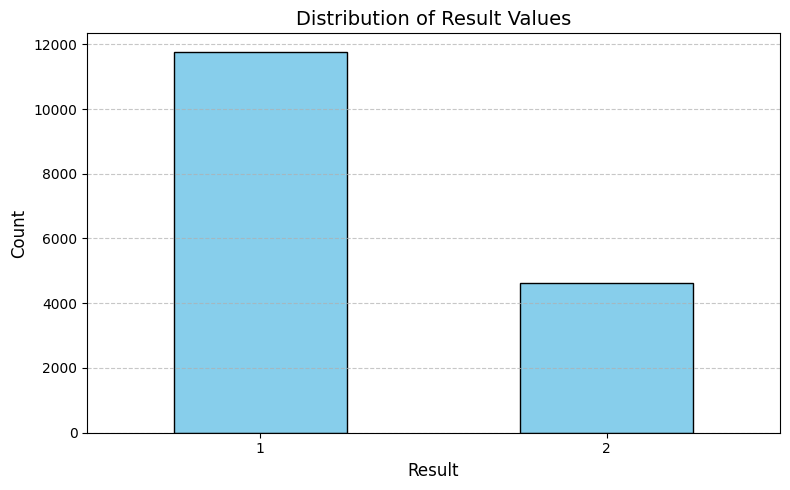

In [23]:
# Đếm số lượng từng giá trị trong cột 'Result'
value_counts = data_clean['Result'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Result Values', fontsize=14)
plt.xlabel('Result', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Nhận xét: Tỷ lệ dữ liệu ở hai giá trị 1 và 2 đang chênh lệch nhau.

# Cân bằng dữ liệu

In [24]:
from sklearn.utils import resample  

# Tách dữ liệu thành hai lớp  
df_majority = data_clean[data_clean['Result'] == 1]  # Lớp chiếm ưu thế  
df_minority = data_clean[data_clean['Result'] == 2]  # Lớp thiểu số  

# Giảm bớt lớp chiếm ưu thế  
df_majority_downsampled = resample(df_majority,   
                                    replace=False,    # Không cho phép lặp lại  
                                    n_samples=len(df_minority),  # Số mẫu bằng lớp thiểu số  
                                    random_state=42)  # Để tái tạo kết quả  

# Kết hợp lại thành DataFrame mới  
df_balanced = pd.concat([df_majority_downsampled, df_minority])  

# Xáo trộn lại dữ liệu  
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)  

# Kiểm tra phân phối  
df_balanced['Result'].value_counts()

Result
1    4639
2    4639
Name: count, dtype: int64

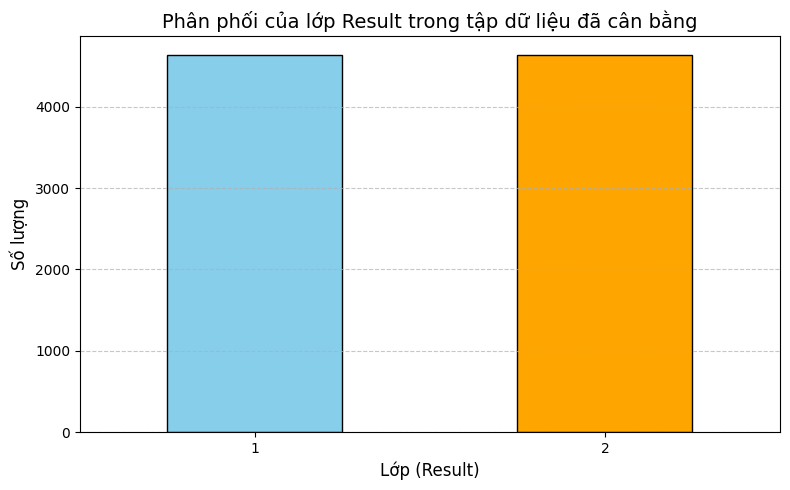

In [25]:
# Kiểm tra phân phối lớp Result sau khi cân bằng
value_counts = df_balanced['Result'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.title('Phân phối của lớp Result trong tập dữ liệu đã cân bằng', fontsize=14)
plt.xlabel('Lớp (Result)', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Nhận xét: Các giá trị đã được cân bằng.

Chỉ số đánh giá cho tập huấn luyện:
{'accuracy': 1.0, 'balanced_accuracy': 1.0, 'mcc': 1.0, 'roc_auc': 1.0, 'f1': 1.0, 'precision': 1.0, 'recall': 1.0}

Chỉ số đánh giá cho tập kiểm tra:
{'accuracy': 0.9989224137931034, 'balanced_accuracy': 0.9989528795811518, 'mcc': 0.9978454580471532, 'roc_auc': 0.9999930269450465, 'f1': 0.9988913525498891, 'precision': 0.9977851605758582, 'recall': 1.0}


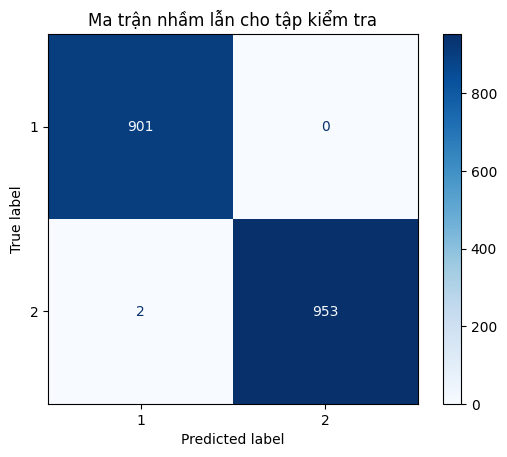

In [26]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, matthews_corrcoef, roc_auc_score, f1_score, precision_score, recall_score  
import matplotlib.pyplot as plt  

# Giả sử df_balanced là DataFrame của bạn  
target_column = 'Result'  # Giả sử 'Result' là cột mục tiêu  
X = df_balanced.drop(columns=[target_column])  
y = df_balanced[target_column]  

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Chuẩn hóa các đặc trưng số  
scaler = StandardScaler()  
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()  
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])  
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])  

# Huấn luyện mô hình Random Forest  
model = RandomForestClassifier(random_state=42)  
model.fit(X_train, y_train)  

# Dự đoán trên tập huấn luyện và tập kiểm tra  
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)  

# Tính toán các chỉ số đánh giá cho tập huấn luyện  
train_metrics = {  
    'accuracy': accuracy_score(y_train, y_train_pred),  
    'balanced_accuracy': balanced_accuracy_score(y_train, y_train_pred),  
    'mcc': matthews_corrcoef(y_train, y_train_pred),  
    'roc_auc': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),  
    'f1': f1_score(y_train, y_train_pred),  
    'precision': precision_score(y_train, y_train_pred),  
    'recall': recall_score(y_train, y_train_pred)  
}  

# Tính toán các chỉ số đánh giá cho tập kiểm tra  
test_metrics = {  
    'accuracy': accuracy_score(y_test, y_test_pred),  
    'balanced_accuracy': balanced_accuracy_score(y_test, y_test_pred),  
    'mcc': matthews_corrcoef(y_test, y_test_pred),  
    'roc_auc': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),  
    'f1': f1_score(y_test, y_test_pred),  
    'precision': precision_score(y_test, y_test_pred),  
    'recall': recall_score(y_test, y_test_pred)  
}  

# In các chỉ số đánh giá  
print('Chỉ số đánh giá cho tập huấn luyện:')  
print(train_metrics)  

print('\nChỉ số đánh giá cho tập kiểm tra:')  
print(test_metrics)  

# Ma trận nhầm lẫn cho tập kiểm tra  
conf_matrix = confusion_matrix(y_test, y_test_pred)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)  
disp.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title('Ma trận nhầm lẫn cho tập kiểm tra')  
plt.show()

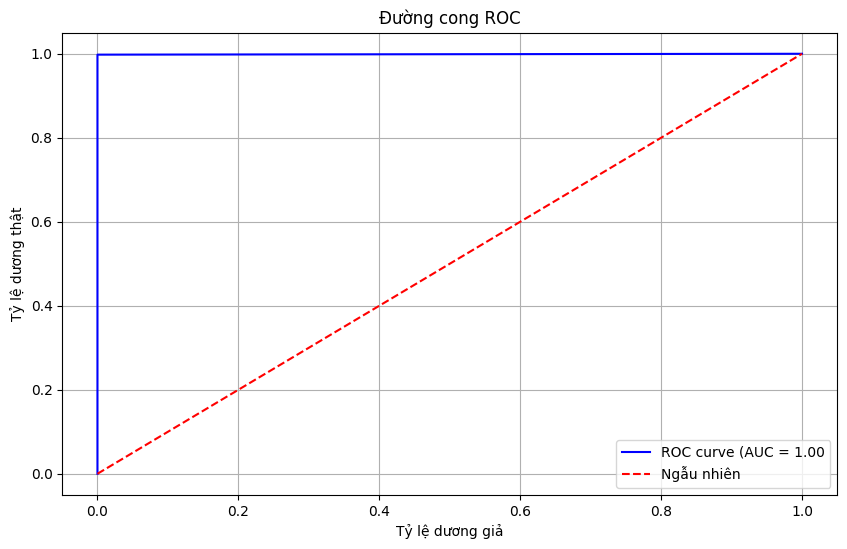

In [27]:
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import ConfusionMatrixDisplay 
# 1. Đường cong ROC  
y_test_binary = y_test.replace({1: 0, 2: 1})  
fpr, tpr, thresholds = roc_curve(y_test_binary, y_test_pred)
roc_auc = auc(fpr, tpr)  

plt.figure(figsize=(10, 6))  
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f}')  
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Ngẫu nhiên')  
plt.xlabel('Tỷ lệ dương giả')  
plt.ylabel('Tỷ lệ dương thật')  
plt.title('Đường cong ROC')  
plt.legend(loc='lower right')  
plt.grid()  
plt.show()   


### Sử dụng mô hình để dự đoán

In [28]:
test_predictions = model.predict(X_test)

# Thêm cột nhãn thực tế và nhãn dự đoán cho tập kiểm tra
comparison_df = X_test.copy()
comparison_df['Actual'] = y_test.values
comparison_df['Predicted'] = test_predictions

# Hiển thị một số dòng để so sánh
print(comparison_df[['Actual', 'Predicted']].sample(5))

      Actual  Predicted
6207       2          2
2960       1          1
4771       1          1
8603       1          1
2392       2          2


<function matplotlib.pyplot.show(close=None, block=None)>

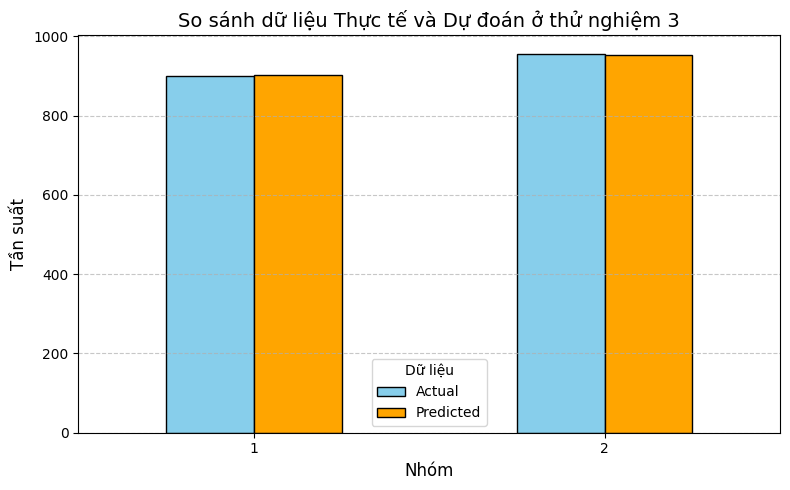

In [29]:
# Đếm tần suất các giá trị trong dữ liệu thực tế và dự đoán
actual_counts = comparison_df['Actual'].value_counts().sort_index()
predicted_counts = comparison_df['Predicted'].value_counts().sort_index()

# Tạo DataFrame để so sánh
comparison_chart = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})

# Vẽ biểu đồ cột so sánh
comparison_chart.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'], edgecolor='black')
plt.title('So sánh dữ liệu Thực tế và Dự đoán ở thử nghiệm 3', fontsize=14)
plt.xlabel('Nhóm', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Dữ liệu', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show

### Nhận xét:
+ Mô hình có kết quả tốt như 2 thử nghiệm trước
+ => Thực hiện thử nghiệm 4 với mô hình Cân bằng và ko xóa ngoại lai, đồng thời sử dụng Autogluon để thử nghiệm.